In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

In [137]:
data = pd.read_csv('y_train.csv',header=None)
data.columns = ['stage']

frequency = data.apply(pd.value_counts)
frequency['stage'] = frequency['stage']/data.shape[0]
frequency.columns = ['frequency']
frequency

,frequency
0.0,0.520875
2.0,0.252728
1.0,0.095511
4.0,0.083946
3.0,0.046940


In [3]:
train = pd.read_csv('X_train.csv',header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.727246,-0.600317,-0.665786,1.492312,1.495149,0.316998,-0.545909,-0.572144,0.102366,1.291956,-0.345626,-0.777419,1.657252,-0.698669,-0.613490,0.251762
1,-0.740231,-0.595162,-0.650848,1.080082,1.320833,0.106728,-0.552834,-0.590282,0.143121,1.405593,-0.271330,-0.784189,1.669754,-0.707108,-0.641951,0.265508
2,-0.743694,-0.601780,-0.679541,1.087206,1.250578,-0.009933,-0.556813,-0.602766,0.029846,0.919164,-0.422630,-0.779007,1.282820,-0.708243,-0.627052,0.480133
3,-0.731980,-0.604807,-0.665158,1.740639,1.559719,0.550951,-0.558923,-0.569229,0.033574,1.488134,-0.229653,-0.783671,1.948721,-0.700967,-0.631030,0.246934
4,-0.730557,-0.601453,-0.664124,1.525684,1.447257,0.332654,-0.550780,-0.592010,0.037956,1.287878,-0.321759,-0.782807,1.748638,-0.703440,-0.628887,0.203630


In [4]:
# normalization
def norm_(x):
    xmean = np.mean(x,0)
    std = np.std(x,0)
    return (x-xmean)/std


train = norm_(train)
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.536238,-0.439734,-0.487394,0.637741,0.717934,0.083636,-0.379363,-0.447989,-0.006857,0.802965,-0.312413,-0.590513,0.849282,-0.649170,-0.580128,0.218433
1,-0.552614,-0.432018,-0.466733,0.326070,0.569571,-0.114184,-0.389694,-0.472636,0.048342,0.911876,-0.199505,-0.598086,0.860159,-0.659418,-0.616336,0.238135
2,-0.556981,-0.441924,-0.506420,0.331457,0.509775,-0.223939,-0.395629,-0.489600,-0.105082,0.445673,-0.429435,-0.592290,0.523500,-0.660796,-0.597381,0.545745
3,-0.542208,-0.446456,-0.486526,0.825491,0.772890,0.303738,-0.398776,-0.444027,-0.100032,0.990985,-0.136168,-0.597507,1.102880,-0.651962,-0.602442,0.211513
4,-0.540414,-0.441434,-0.485096,0.662972,0.677172,0.098365,-0.386630,-0.474984,-0.094097,0.799056,-0.276141,-0.596541,0.928794,-0.654964,-0.599716,0.149447


The eigenvalues:
	 [6.39043077e+00 3.81161239e+00 2.48555582e+00 1.26216986e+00
 8.52419220e-01 6.03036024e-01 1.90268007e-01 1.43819305e-01
 1.01624709e-01 7.00310700e-02 3.39943238e-02 2.38474623e-02
 1.17048299e-02 1.04777741e-02 6.69185807e-03 2.79102250e-03]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


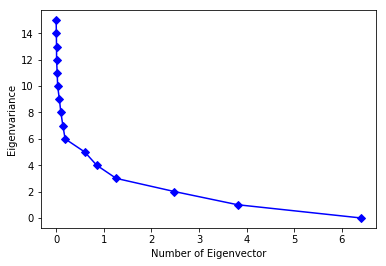

In [138]:
pca = PCA(n_components=16)
pca.fit(train)
eigenvalues = pca.explained_variance_
print("The eigenvalues:\n\t", eigenvalues)

idx = eigenvalues.argsort()[::-1]
print(idx)

plt.plot(eigenvalues,idx, color='blue', marker='D')
plt.ylabel('Eigenvariance')
plt.xlabel('Number of Eigenvector')
plt.savefig('eigenspectrum')
plt.show()

In [6]:
# number of components needed to explain 90% of variance
pca = PCA(n_components=16)
pca.fit(train)
eigen_values =pca.explained_variance_ratio_
counter = 0
ratio = 0
while ratio <= 0.9:
    ratio += eigen_values[counter]
    counter += 1
counter

5

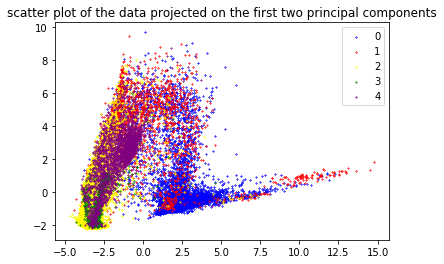

In [8]:
#scatter plot of first two components
pca = PCA(n_components=2)
pca.fit(train)
train_new = pca.transform(train) #project features into 2-dimension

y_train = pd.read_csv('y_train.csv',header=None)
plt_df = pd.DataFrame(train_new)
plt_df['stage'] = y_train
colors = ['blue','red','yellow','green','purple']

for i in range(5):
    stage = plt_df.loc[(plt_df['stage']==i)]
    plt.scatter(stage[0],stage[1],color=colors[i],marker='x',s=1.5,alpha=0.7)
plt.legend(labels=[0,1,2,3,4])
plt.title("scatter plot of the data projected on the first two principal components")
plt.savefig('scatter plot')
plt.show()

In [11]:
# Kmeans clusting
kmeans = KMeans(n_clusters=5).fit(train)
cluster_center = kmeans.cluster_centers_
print('The coordinates of five cluster centers:\n',cluster_center)

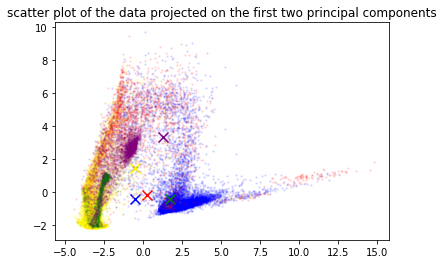

In [13]:
#cluster center of class 0 to 4 are in color blue, red, yellow, green, purple

colors = ['blue','red','yellow','green','purple']
for i in range(5):
    stage = plt_df.loc[(plt_df['stage']==i)]
    plt.scatter(stage[0],stage[1],color=colors[i],marker='o',s=2,alpha=0.1)
    plt.scatter(cluster_center[i,0],cluster_center[i,1],marker='x',c=colors[i],s=100)

plt.title("scatter plot of the data projected on the first two principal components")
plt.savefig('scatter plot2')
plt.show()

In [67]:
# multi-nominal logistic regression

#Prepare the dataset
X_train = train
y_train = pd.read_csv('y_train.csv',header=None)

X_training = train.loc[:int(0.7*train.shape[0]),]
X_testing = train.loc[int(0.7*train.shape[0]):,]
y_training = y_train.loc[:int(0.7*train.shape[0]),]
y_testing = y_train.loc[int(0.7*train.shape[0]):,]

X_test = pd.read_csv('X_test.csv',header=None)
y_test = pd.read_csv('y_test.csv',header=None)

#normalization
X_training = norm_(X_training)
X_testing = norm_(X_testing)

X_test = norm_(X_test)

#build the multi-nominal logistic regression model
#here I just use the default regularization L2
mnlr = LR(C=1,multi_class = 'multinomial', random_state=123, penalty='l2',solver='newton-cg')
mnlr.fit(X_training,y_training.astype(int))

#the loss of training and test sets
lr_train_loss = 1- mnlr.score(X_testing,y_testing.astype(int)) 
lr_test_loss = 1 -mnlr.score(X_test,y_test.astype(int))
print('multi-nominal logistic regression:\n','training loss:',lr_train_loss,'\n','test loss:',lr_test_loss)

D:\Anaconda3.5.2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


multi-nominal logistic regression:
 training loss: 0.1264083811029848 
 test loss: 0.11358895043522044


In [140]:
#random forest classifier

#Creating a random forest Classifier
clf = RandomForestClassifier(n_estimators=200,n_jobs=2,random_state=123)
#Training the classifier
clf.fit(X_training,y_training.astype(int))
print('Random Forest Classifier\n','loss of training set:',1-clf.score(X_testing,y_testing),'\n','loss of test set:',1-clf.score(X_test,y_test))

Random Forest Classifier
 loss of training set: 0.15744218224945639 
 loss of test set: 0.12387598014531331


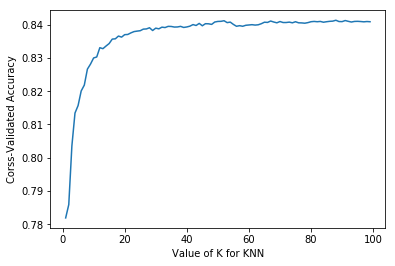

In [123]:
#K nearest neighbor
y_train = np.array(y_train)
y_train = y_train.reshape(y_train.shape[0],)

k_range = range(1,100)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=4)
    scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')# for classification
    #loss = -cross_val_score(knn,X,y,cv=10,scoring='mean_squared_error')# for regression
    k_score.append(scores.mean())

plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Corss-Validated Accuracy')
plt.savefig('KNN_CROSS_VAL')
plt.show()

In [136]:
# K nearest neighbor
# from the figure we can see when k is at the range of 70-99, the scores are the highest
#try to figure out the loss of training set and test set
k = 80
y_training = np.array(y_training).reshape(y_training.shape[0],)
knn = KNeighborsClassifier(n_neighbors=k,n_jobs=4)
 
#train the model
knn.fit(X_training, y_training)
 
#print the loss of training set and test set
print('loss of KNeighbors Classifier')
print('loss of training set',1-knn.score(X_testing,y_testing))
print("loss of test set",1-knn.score(X_test, y_test))

loss of KNeighbors Classifier
loss of training set 0.12897805890492187
loss of test set 0.10035249262642976
